<a href="https://colab.research.google.com/github/riz-adnan/Landslide-Mapping-Using-Deep-Learning/blob/main/Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!pip install utils
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=d9ea702cb190c9313786c7b7d28bcefa3e63616a0da63572c65964c23ba0fe81
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
!kaggle datasets download -d tekbahadurkshetri/landslide4sense


Dataset URL: https://www.kaggle.com/datasets/tekbahadurkshetri/landslide4sense
License(s): other
100% 2.85G/2.85G [01:52<00:00, 33.2MB/s]
100% 2.85G/2.85G [01:52<00:00, 27.1MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('landslide4sense.zip', 'r') as zip_ref:
    zip_ref.extractall('landslide4sense')


In [ ]:
!pip install tensorflow matplotlib

In [ ]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
path_single = r"landslide4sense/TrainData/img/image_2000.h5"
path_single_mask = r'landslide4sense/TrainData/mask/mask_2000.h5'

ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


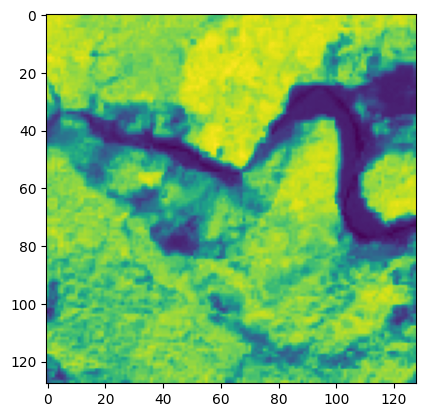

In [ ]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])

    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


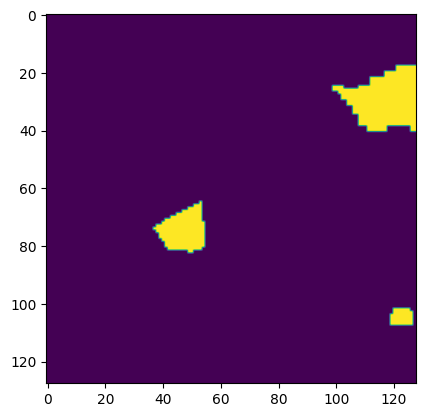

In [ ]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [ ]:
path_single = r"landslide4sense/TrainData/img/image_10.h5"
path_single_mask = r'landslide4sense/TrainData/mask/mask_1.h5'
TRAIN_PATH = r"landslide4sense/TrainData/img/*.h5"
TRAIN_MASK = r'landslide4sense/TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION


    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data


0 landslide4sense/TrainData/img/image_1.h5 landslide4sense/TrainData/mask/mask_1.h5
1 landslide4sense/TrainData/img/image_10.h5 landslide4sense/TrainData/mask/mask_10.h5
2 landslide4sense/TrainData/img/image_100.h5 landslide4sense/TrainData/mask/mask_100.h5
3 landslide4sense/TrainData/img/image_1000.h5 landslide4sense/TrainData/mask/mask_1000.h5
4 landslide4sense/TrainData/img/image_1001.h5 landslide4sense/TrainData/mask/mask_1001.h5
5 landslide4sense/TrainData/img/image_1002.h5 landslide4sense/TrainData/mask/mask_1002.h5
6 landslide4sense/TrainData/img/image_1003.h5 landslide4sense/TrainData/mask/mask_1003.h5
7 landslide4sense/TrainData/img/image_1004.h5 landslide4sense/TrainData/mask/mask_1004.h5
8 landslide4sense/TrainData/img/image_1005.h5 landslide4sense/TrainData/mask/mask_1005.h5
9 landslide4sense/TrainData/img/image_1006.h5 landslide4sense/TrainData/mask/mask_1006.h5
10 landslide4sense/TrainData/img/image_1007.h5 landslide4sense/TrainData/mask/mask_1007.h5
11 landslide4sense/Tr

<ipython-input-11-fefaee75c89a>:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1684 landslide4sense/TrainData/img/image_2514.h5 landslide4sense/TrainData/mask/mask_2514.h5
1685 landslide4sense/TrainData/img/image_2515.h5 landslide4sense/TrainData/mask/mask_2515.h5
1686 landslide4sense/TrainData/img/image_2516.h5 landslide4sense/TrainData/mask/mask_2516.h5
1687 landslide4sense/TrainData/img/image_2517.h5 landslide4sense/TrainData/mask/mask_2517.h5
1688 landslide4sense/TrainData/img/image_2518.h5 landslide4sense/TrainData/mask/mask_2518.h5
1689 landslide4sense/TrainData/img/image_2519.h5 landslide4sense/TrainData/mask/mask_2519.h5
1690 landslide4sense/TrainData/img/image_252.h5 landslide4sense/TrainData/mask/mask_252.h5
1691 landslide4sense/TrainData/img/image_2520.h5 landslide4sense/TrainData/mask/mask_2520.h5
1692 landslide4sense/TrainData/img/image_2521.h5 landslide4sense/TrainData/mask/mask_2521.h5
1693 landslide4sense/TrainData/img/image_2522.h5 landslide4sense/TrainData/mask/mask_2522.h5
1694 landslide4sense/TrainData/img/image_2523.h5 landslide4sense/TrainDa

<ipython-input-11-fefaee75c89a>:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2265 landslide4sense/TrainData/img/image_3037.h5 landslide4sense/TrainData/mask/mask_3037.h5
2266 landslide4sense/TrainData/img/image_3038.h5 landslide4sense/TrainData/mask/mask_3038.h5
2267 landslide4sense/TrainData/img/image_3039.h5 landslide4sense/TrainData/mask/mask_3039.h5
2268 landslide4sense/TrainData/img/image_304.h5 landslide4sense/TrainData/mask/mask_304.h5
2269 landslide4sense/TrainData/img/image_3040.h5 landslide4sense/TrainData/mask/mask_3040.h5
2270 landslide4sense/TrainData/img/image_3041.h5 landslide4sense/TrainData/mask/mask_3041.h5
2271 landslide4sense/TrainData/img/image_3042.h5 landslide4sense/TrainData/mask/mask_3042.h5
2272 landslide4sense/TrainData/img/image_3043.h5 landslide4sense/TrainData/mask/mask_3043.h5
2273 landslide4sense/TrainData/img/image_3044.h5 landslide4sense/TrainData/mask/mask_3044.h5
2274 landslide4sense/TrainData/img/image_3045.h5 landslide4sense/TrainData/mask/mask_3045.h5
2275 landslide4sense/TrainData/img/image_3046.h5 landslide4sense/TrainDa

In [ ]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


In [ ]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

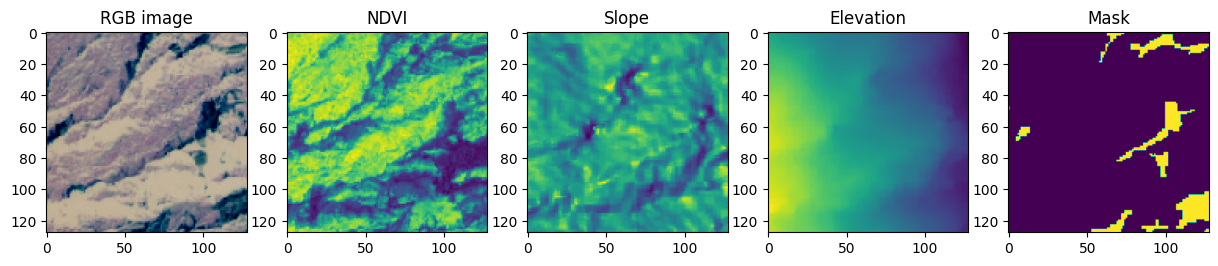

In [ ]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

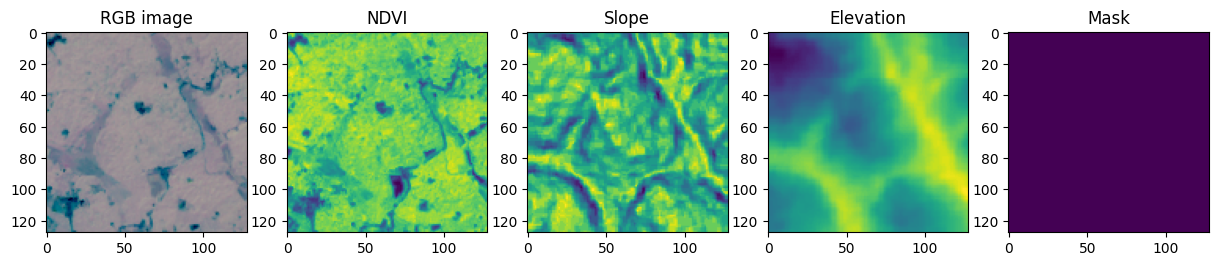

In [ ]:
img=14
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [ ]:

def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy')

    return model

In [ ]:
model = unet_model(128, 128, 6)


history = model.fit(x_train, y_train, batch_size=16,
          epochs=100,
          verbose = 2,
          validation_data=(x_valid, y_valid),
          )

model.save("model_save.h5")

Epoch 1/100
190/190 - 50s - 265ms/step - loss: 0.0882 - val_loss: 0.0550
Epoch 2/100
190/190 - 45s - 237ms/step - loss: 0.0470 - val_loss: 0.0499
Epoch 3/100
190/190 - 10s - 54ms/step - loss: 0.0411 - val_loss: 0.0452
Epoch 4/100
190/190 - 8s - 40ms/step - loss: 0.0372 - val_loss: 0.0418
Epoch 5/100
190/190 - 10s - 54ms/step - loss: 0.0350 - val_loss: 0.0432
Epoch 6/100
190/190 - 10s - 54ms/step - loss: 0.0336 - val_loss: 0.0419
Epoch 7/100
190/190 - 10s - 54ms/step - loss: 0.0327 - val_loss: 0.0390
Epoch 8/100
190/190 - 8s - 40ms/step - loss: 0.0330 - val_loss: 0.0399
Epoch 9/100
190/190 - 8s - 40ms/step - loss: 0.0316 - val_loss: 0.0403
Epoch 10/100
190/190 - 10s - 54ms/step - loss: 0.0316 - val_loss: 0.0407
Epoch 11/100
190/190 - 10s - 53ms/step - loss: 0.0315 - val_loss: 0.0385
Epoch 12/100
190/190 - 8s - 40ms/step - loss: 0.0303 - val_loss: 0.0372
Epoch 13/100
190/190 - 8s - 40ms/step - loss: 0.0303 - val_loss: 0.0417
Epoch 14/100
190/190 - 8s - 40ms/step - loss: 0.0302 - val_loss